In [1]:
import pandas as pd 
import numpy as np
data = pd.read_csv('CarPrice_Assignment.csv')
print("Dataset Head:")
print(data.head())
print("\nData Info:")
data.info()

Dataset Head:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peak

In [2]:
print("\nMissing Values:")
print(data.isnull().sum())
data = data.dropna()
data = pd.get_dummies(data, drop_first=True)
data = data.drop_duplicates()
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
print("\nOutliers Detected:")
print((z_scores > 3).sum())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.drop('price', axis=1)
y = data['price']
X_scaled = scaler.fit_transform(X)


Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Outliers Detected:
car_ID              0
symboling           0
wheelbase           1
carlength           0
carwidth            0
                   ..
fuelsystem_idi     20
fuelsystem_mfi      1
fuelsystem_mpfi     0
fuelsystem_spdi     9
fuelsystem_spfi     1
Length: 191, dtype: int64


In [5]:
from sklearn.metrics import mean_absolute_error

# Step 2: Linear Regression
print("\n1) Linear Regression:")
lr_y_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
print(f"Linear Regression MSE: {lr_mse:.4f}, R²: {lr_r2:.4f}, MAE: {lr_mae:.4f}")

# Step 3: Decision Tree Regressor
print("\n2) Decision Tree Regressor:")
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
dt_mae = mean_absolute_error(y_test, dt_y_pred)
print(f"Decision Tree MSE: {dt_mse:.4f}, R²: {dt_r2:.4f}, MAE: {dt_mae:.4f}")

# Step 4: Random Forest Regressor
print("\n3) Random Forest Regressor:")
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
print(f"Random Forest MSE: {rf_mse:.4f}, R²: {rf_r2:.4f}, MAE: {rf_mae:.4f}")

# Step 5: Gradient Boosting Regressor
print("\n4) Gradient Boosting Regressor:")
gbr_y_pred = gbr_model.predict(X_test)
gbr_mse = mean_squared_error(y_test, gbr_y_pred)
gbr_r2 = r2_score(y_test, gbr_y_pred)
gbr_mae = mean_absolute_error(y_test, gbr_y_pred)
print(f"Gradient Boosting MSE: {gbr_mse:.4f}, R²: {gbr_r2:.4f}, MAE: {gbr_mae:.4f}")

# Step 6: Support Vector Regressor
print("\n5) Support Vector Regressor:")
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
print(f"Support Vector Regressor MSE: {svr_mse:.4f}, R²: {svr_r2:.4f}, MAE: {svr_mae:.4f}")



1) Linear Regression:
Linear Regression MSE: 17965951815558060537544804663296.0000, R²: -227578372818701127778304.0000, MAE: 2317175426072076.5000

2) Decision Tree Regressor:
Decision Tree MSE: 10532678.5297, R²: 0.8666, MAE: 2098.3090

3) Random Forest Regressor:
Random Forest MSE: 3675331.0255, R²: 0.9534, MAE: 1387.3101

4) Gradient Boosting Regressor:
Gradient Boosting MSE: 5402849.3765, R²: 0.9316, MAE: 1685.6164

5) Support Vector Regressor:
Support Vector Regressor MSE: 87001665.0953, R²: -0.1021, MAE: 5707.0222


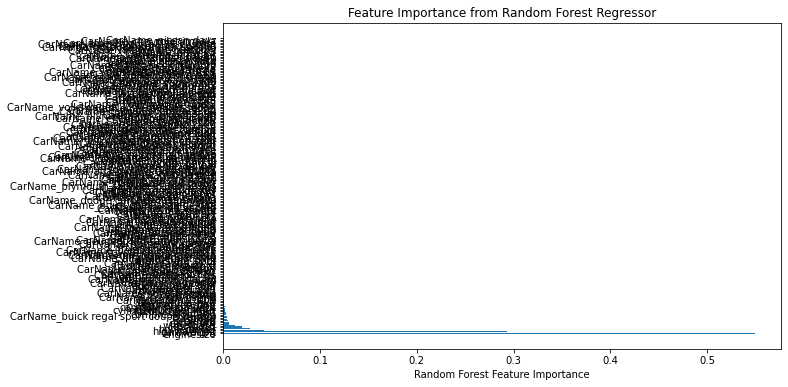

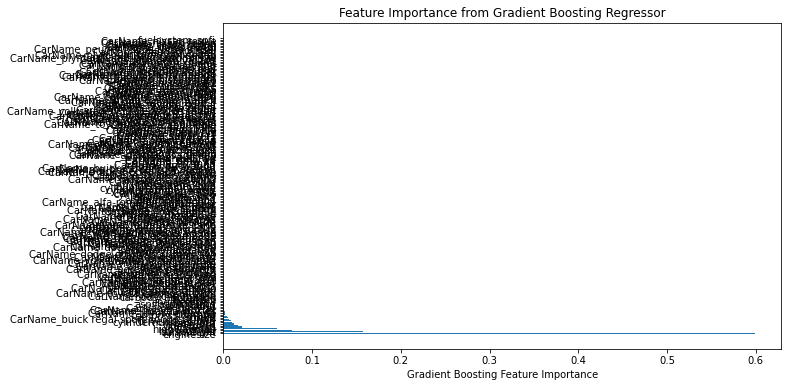

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rf_feature_importance = rf_model.feature_importances_
gbr_feature_importance = gbr_model.feature_importances_

features = X.columns

sorted_idx_rf = np.argsort(rf_feature_importance)[::-1]
sorted_idx_gbr = np.argsort(gbr_feature_importance)[::-1]


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_rf)), rf_feature_importance[sorted_idx_rf], align='center')
plt.yticks(range(len(sorted_idx_rf)), [features[i] for i in sorted_idx_rf])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance from Random Forest Regressor")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx_gbr)), gbr_feature_importance[sorted_idx_gbr], align='center')
plt.yticks(range(len(sorted_idx_gbr)), [features[i] for i in sorted_idx_gbr])
plt.xlabel("Gradient Boosting Feature Importance")
plt.title("Feature Importance from Gradient Boosting Regressor")
plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


gbr = GradientBoostingRegressor(random_state=42)


grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)


best_gbr = grid_search.best_estimator_


best_gbr_y_pred = best_gbr.predict(X_test)


best_gbr_mse = mean_squared_error(y_test, best_gbr_y_pred)
best_gbr_r2 = r2_score(y_test, best_gbr_y_pred)
best_gbr_mae = mean_absolute_error(y_test, best_gbr_y_pred)

print(f"Tuned Gradient Boosting MSE: {best_gbr_mse:.4f}, R²: {best_gbr_r2:.4f}, MAE: {best_gbr_mae:.4f}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Gradient Boosting MSE: 5345377.6949, R²: 0.9323, MAE: 1638.2172
